In [113]:
#!pip install librosa

In [ ]:
import librosa
from librosa import feature 
import pandas as pd
%matplotlib inline

In [68]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load('/Users/Rohit/Desktop/emotifymusic/rock/1.mp3')

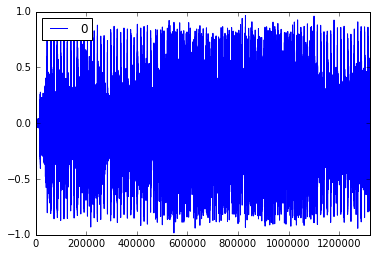

In [69]:
pd.DataFrame(y).plot()

In [70]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [71]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 99.38 beats per minute


In [13]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

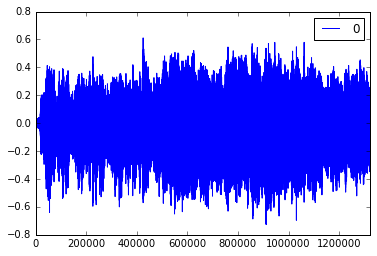

In [76]:
pd.DataFrame(y_harmonic).plot()

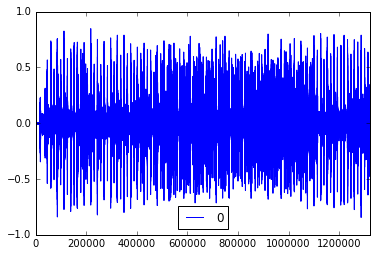

In [77]:
pd.DataFrame(y_percussive).plot()

In [72]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times = pd.DataFrame(beat_times)
#librosa.output.times_csv('beat_times.csv', beat_times)
beat_times.head()

,0
0,0.859138
1,1.509297
2,2.136236
3,2.739955
4,3.343673


In [42]:
# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

In [46]:
#beat_frames = pd.DataFrame(beat_frames)
#beat_frames.head()

,0
0,37
1,65
2,92
3,118
4,144


In [93]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
#mfcc = pd.DataFrame(mfcc).T
#mfcc.head()

In [84]:
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)
#chromagram = pd.DataFrame(chromagram).T
#chromagram.head()

In [94]:
# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)
#mfcc_delta = pd.DataFrame(mfcc_delta).T
#mfcc_delta.head()

In [ ]:
# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                   beat_frames,
                                   aggregate=np.median)
pd.DataFrame(beat_chroma).T.plot()

In [95]:
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                       beat_frames)

In [96]:
# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])